참고 URL :

* [Data Science FAQ | Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)

* [Novice to Grandmaster | Kaggle](https://www.kaggle.com/ash316/novice-to-grandmaster)
* [DATA](https://www.kaggle.com/kaggle/kaggle-survey-2017?select=conversionRates.csv)

* 이 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련 된 인사이트를 얻어볼 수 있지 않을까 가설을 세워본다.

# 캐글러를 대상으로 한 설문조사

* 설문기간 : 2017년 8월 7일부터 8월 25일까지
* 평균 응답 시간은 16.4 분
* 171 개 국가 및 지역에서 16,716 명의 응답자
* 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
* 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는  제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
* 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
* 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
* 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
* 질문은 선택적
* 모든 질문이 모든 응답자에게 보여지는 것은 아님
* 취업을 한 사람과 학생을 나누어 다른 질문을 함
* 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
* 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
* 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


# 데이터 파일

5 개의 데이터 파일을 제공

* schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
* multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
* freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
* conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
* RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [2]:
# 노트북에 그래프를 출력하기위해 
%matplotlib inline

# 라이브러리 임포트
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

# warning massage 무시하기 
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.gigure_format="retina"

In [3]:
question = pd.read_csv('data/schema.csv')
question
question.shape

(290, 3)

In [4]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv'
                  , encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


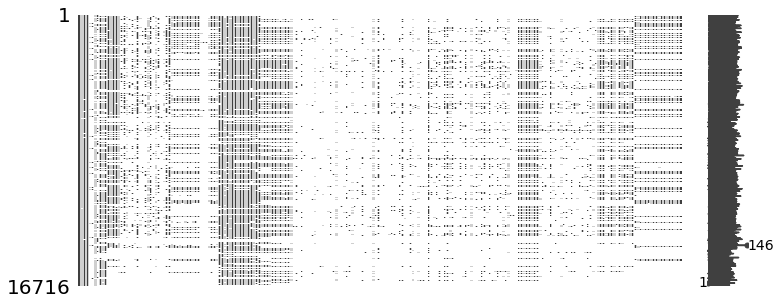

In [8]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다. 

import missingno as msno
msno.matrix(mcq, figsize=(12,5))

# 설문통계

In [41]:
df_gender = pd.DataFrame(mcq['GenderSelect'].value_counts())

In [43]:
df_gender_percent = pd.DataFrame(mcq['GenderSelect'].value_counts(normalize=True))

In [47]:
df_gender_merge = df_gender.merge(df_gender_percent, left_index=True, right_index=True)

df_gender_merge.columns = ['응답수', '비율']

df_gender_merge

,응답수,비율
Male,13610,0.818844
Female,2778,0.167138
A different identity,159,0.009566
"Non-binary, genderqueer, or gender non-conforming",74,0.004452


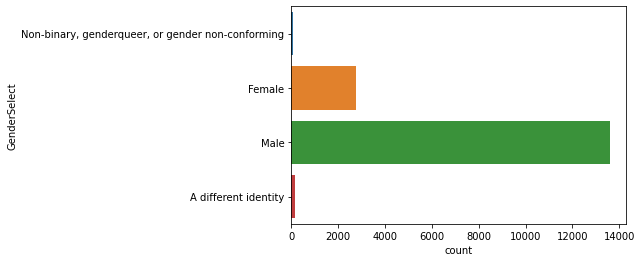

In [10]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [11]:
# 국가별 응답수 
con_df = pd.DataFrame(mcq['Country'].value_counts())

# country 컬럼을 인덱스로 지정 
con_df['국가'] = con_df.index

con_df.columns=['응답수', '국가']
# index컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다. 

con_df = con_df.reset_index().drop('index', axis=1)
con_df


,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [12]:
# 연령에 대한 정보를 본다.
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

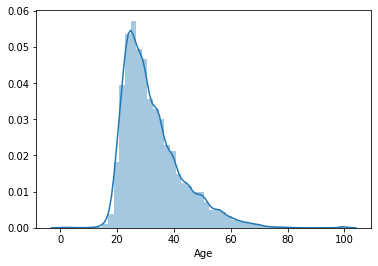

In [13]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])



응답자 대부분이 20, 30대 정도. 20대 부터 급격히 늘어나며, 30대가 가장많다. 평균 나이는 32세 

# 학력

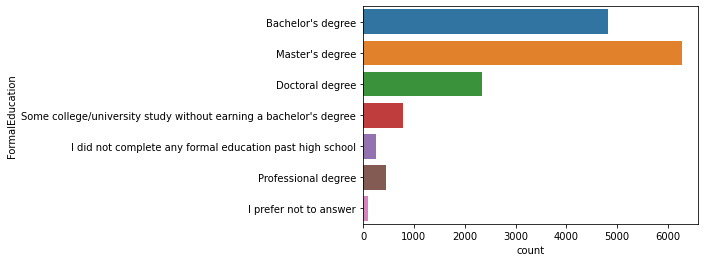

In [14]:
sns.countplot(data=mcq, y='FormalEducation')

학사보다 석사 학위가 더 많으며, 박사 학위를 가진 사람들도 많다. 

# 전공

In [15]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션은 비율을 보여준다. 
mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts())

mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True))

mcq_major_percent
mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True)


mcq_major_df.columns = ['응답수', '비율']


mcq_major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 순이다.

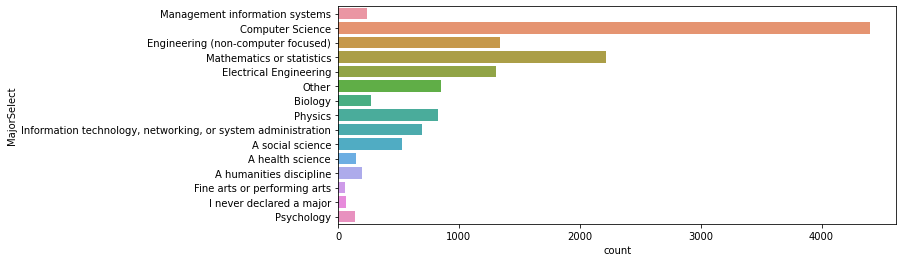

In [16]:
# 재학중인 사람들의 전공현황 

plt.figure(figsize=(10,4))
sns.countplot(data=mcq, y='MajorSelect')

# 취업여부

In [17]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())

mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))

mcq_es_percent
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)


mcq_es_df.columns = ['응답수', '비율']


mcq_es_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


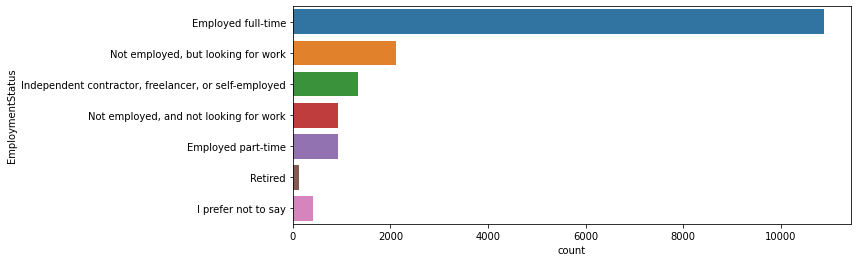

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(data=mcq, y='EmploymentStatus')

응답자의 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%이다.

# 프로그래밍 경험
* Tenure 항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지 대한 질문, 대부분 5년미만이며, 1-2년의 경험을 가진 사람들이 많다. 

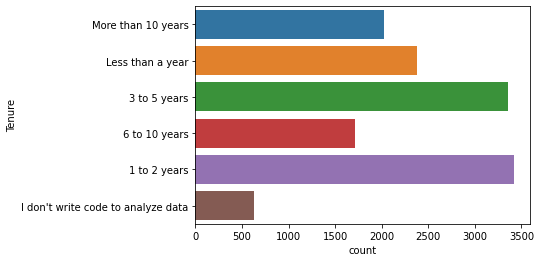

In [19]:
sns.countplot(data=mcq, y='Tenure')

# 한국인 표본 분석

## 연령대

The number of interviewees in Korea: 194


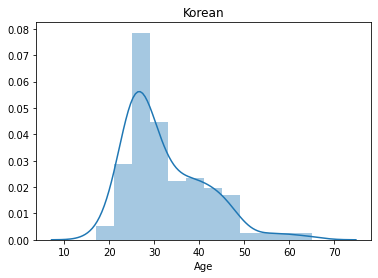

In [20]:
korea = mcq.loc[(mcq['Country'] == 'South Korea')]


print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

## 성별


In [21]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

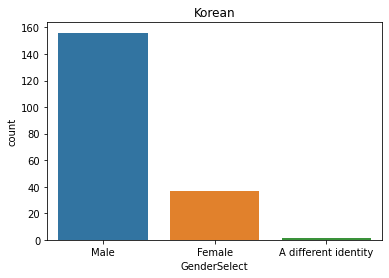

In [22]:
sns.countplot(data=korea, x='GenderSelect')
plt.title('Korean')


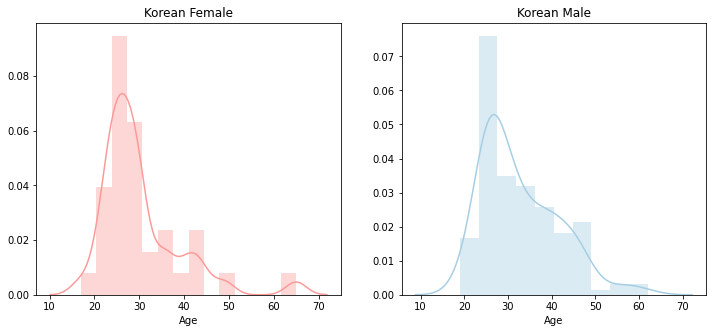

In [23]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
ax1.title.set_text('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
ax2.title.set_text('Korean Male')

## 취업여부

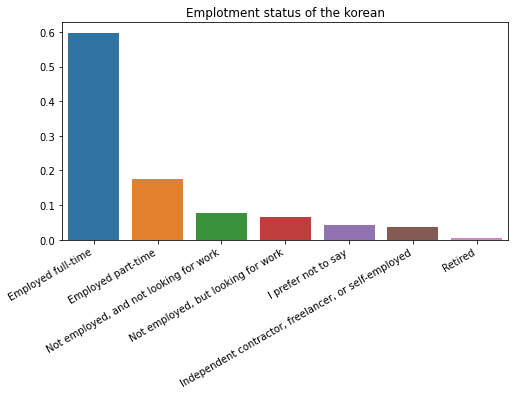

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(x=korea['EmploymentStatus'].unique()
            , y=korea['EmploymentStatus'].value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')

plt.ylabel('')
plt.title('Emplotment status of the korean')
plt.show()

In [25]:
## 학생여부

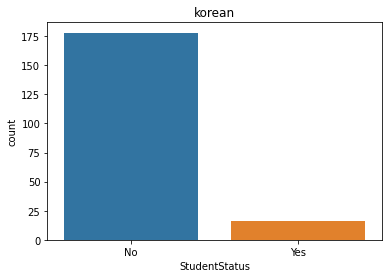

In [26]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(data=korea, x='StudentStatus')
plt.title('korean')
plt.show()

# 자주 묻는 질문 FAQ
* 초보들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.


## Q1. Python과 R중 어떤 언어를 배워야 할까요?

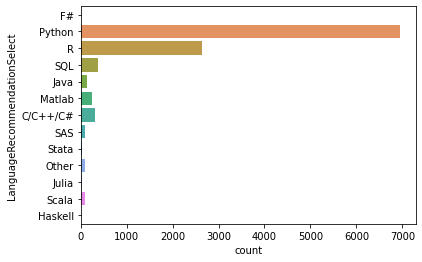

In [27]:
sns.countplot(data=mcq, y='LanguageRecommendationSelect')

전문가들이 선호하는 언어를 알아본다

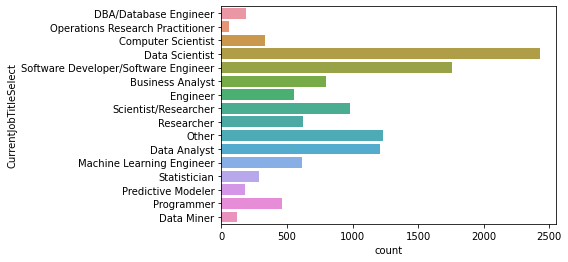

In [28]:
# 현재 하고있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [29]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

(7158, 228)


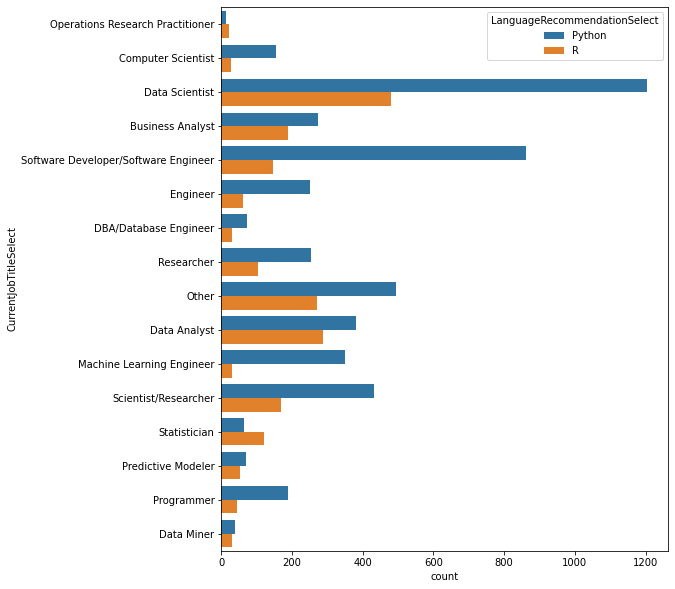

In [30]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다. 

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R'))]

print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(data = data, y='CurrentJobTitleSelect', hue= 'LanguageRecommendationSelect')

대체적으로 R보다 Python을 더 선호. 통계관련 쪽은 R을더 선호 

## Q2.데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
* 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고있다. 으답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

### 데이터사이언스 툴

In [31]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)

mcq_ml_tool_df.columns=['응답수', '비율']
mcq_ml_tool_df

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


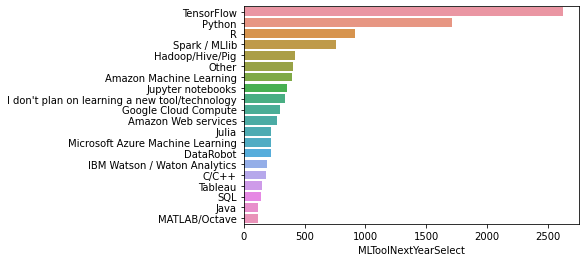

In [32]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x= data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답. 그리고 Python이 15%, R은 8%로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다. 

### 데이터 사이언스 방법 Data Science Methods


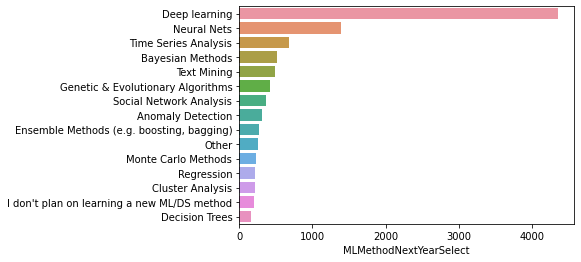

In [33]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
data
sns.barplot(y=data.index, x=data)

응답에 대한 토예끌 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 베깅 같은 앙상블 메소드도 있다. 

### 어디에서 데이터 사이언스를 배워야 할까요?

In [34]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name='platform'

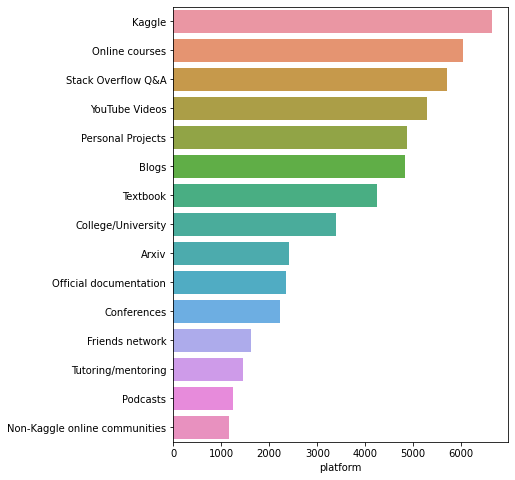

In [35]:
# print(s)
plt.figure(figsize=(6,8))
data=s[s != 'nan'].value_counts().head(15)
data
sns.barplot(y=data.index, x=data)

* kaggle이 응답자들 사이에서 가장 인기있는 학습 플랫폼
* 그러나 이 설문조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음
* 온라인 코스, 스택 오버플로 및 유튜브 상위 5대 우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다

In [36]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[
    question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All
